## #  Quantitative Statistical Ecology Programs in Africa
This notebook is to obtain a comprehensive list of African universities form two different sources of data:
    _local csv file containing university information, which includes details such as university name, country, longitude and latitude.
    _universities library, which provides programmatic access to a vast collection of university information.
By combining data from these sources, the notebook aims to create a more complete and accurate list of African universities.

The resulting dataset can be used for various purposes, such as research, analysis, or generating insights into higher education across the African continent.

In [6]:
import pandas as pd
import warnings

# Suppress FutureWarning and UserWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Transform the data into a DataFrame.
program_df = pd.read_parquet('qantitative_statistical_ecology_programs.parquet')

program_df = program_df.rename(columns={'country': 'Country', 'name': 'University', 'longitude': 'longitude', 'latitude': 'latitude'})
# ed DataFrame to a Parquet file
program_df.head(1)


,University,Country
0,University of Cape Town,South Africa


#### Add coordinates 

In [7]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def add_coordinates(df, uni_address_column, coun_address_column):
    """
    This function enables you to extract latitude and longitude coordinates 
    by geocoding university addresses and country addresses within a DataFrame
       Inputs:
            df: A DataFrame that contains the data to be processed. It should have columns corresponding to the university address and the country name
            uni_address_column: The column name or index representing the university address in the DataFrame
            coun_address_column: The column name or index representing the country name in the DataFrame
        Outputs:
            df: The updated DataFrame with additional columns for latitude and longitude

    """
    geolocator = Nominatim(user_agent="university-locator")
    df['latitude'] = None
    df['longitude'] = None

    def geocode_with_timeout(address):
        try:
            location = geolocator.geocode(address)
            return location
        except GeocoderTimedOut:
            return geocode_with_timeout(address)
        except Exception as e:
            return None

    for index, row in df.iterrows():
        uni_address = row[uni_address_column]
        coun_address = row[coun_address_column]
        location = geocode_with_timeout(uni_address)

        if location is None:
            location = geocode_with_timeout(coun_address)

        if location:
            df.at[index, 'latitude'] = location.latitude
            df.at[index, 'longitude'] = location.longitude

    return df

try:
    df_with_coordinates = pd.read_parquet('qantitative_statistical_ecology_programs_coordinates.parquet')
     
except FileNotFoundError:
    df_with_coordinates = add_coordinates(program_df, 'University', 'Country')
    df_with_coordinates.to_parquet('qantitative_statistical_ecology_programs_coordinates.parquet')
    
 


df_with_coordinates

,University,Country,latitude,longitude
0,University of Cape Town,South Africa,-33.956756,18.467578
1,Stellenbosch University,South Africa,-33.931522,18.867666
2,Rhodes University,South Africa,-33.314189,26.51643
3,Nelson Mandela University,South Africa,-29.110668,26.186476
4,University of the Witwatersrand,South Africa,-26.188877,28.024791
5,University of KwaZulu-Natal,South Africa,-29.867816,30.979684
6,University of Pretoria,South Africa,-25.651375,28.179387
7,University of the Western Cape,South Africa,-33.93273,18.62864
8,University of Nairobi,Kenya,-1.255167,36.72481
9,Egerton University,Kenya,-0.368569,35.932296


#### Plot

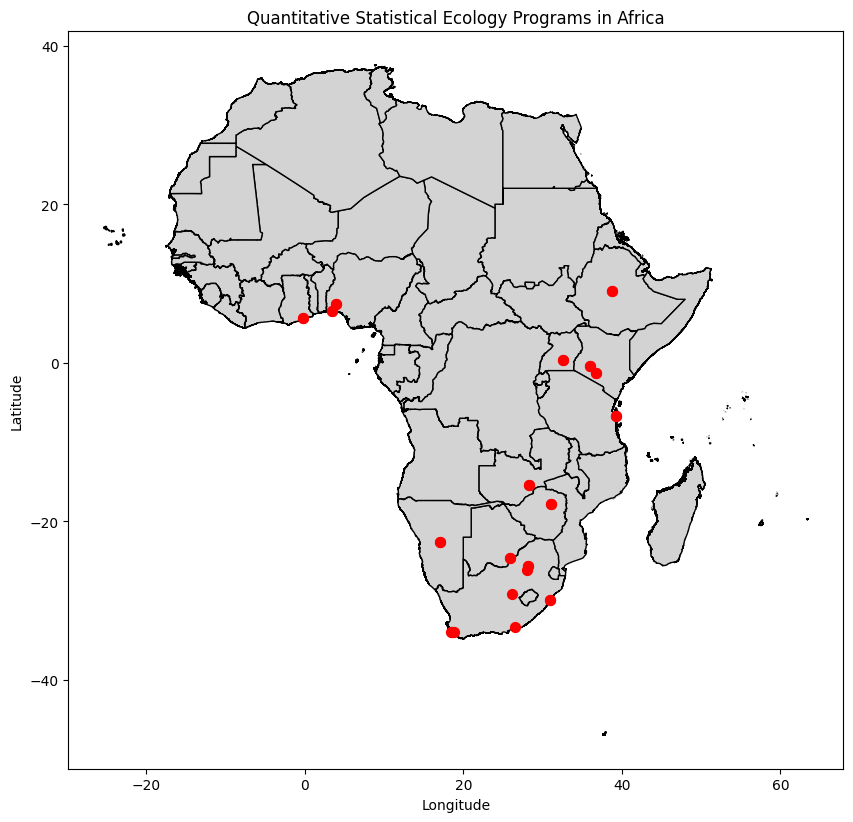

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scripts import map_plot
import os

# Get the current directory (path) of the notebook
notebook_path = os.getcwd()

# Specify the name of the child directory or file
child_name = "afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the desired child directory or file name

# Construct the path to the child directory or file
child_path = os.path.join(notebook_path, child_name)
 
 
africa_shapefile = child_path # Replace with the actual file path

map_plot(africa_shapefile,df_with_coordinates,"Quantitative Statistical Ecology Programs in Africa")